### Exploring Credit Risks

This activity is another open exploration of a dataset using both cleaning methods and visualizations.  The data describes customers as good or bad credit risks based on a small set of features specified below.  Your task is to create a Jupyter notebook with an exploration of the data using both your `pandas` cleaning and analysis skills and your visualization skills using `matplotlib`, `seaborn`, and `plotly`.  Your final notebook should be formatted with appropriate headers and markdown cells with written explanations for the code that follows. 

Post your notebook file in Canvas, as well as a brief (3-4 sentence) description of what you found through your analysis. Respond to your peers with reflections on thier analysis. 

-----


##### Data Description

```
1. Status of existing checking account, in Deutsche Mark.
2. Duration in months
3. Credit history (credits taken, paid back duly, delays, critical accounts)
4. Purpose of the credit (car, television,...)
5. Credit amount
6. Status of savings account/bonds, in Deutsche Mark.
7. Present employment, in number of years.
8. Installment rate in percentage of disposable income
9. Personal status (married, single,...) and sex
10. Other debtors / guarantors
11. Present residence since X years
12. Property (e.g. real estate)
13. Age in years
14. Other installment plans (banks, stores)
15. Housing (rent, own,...)
16. Number of existing credits at this bank
17. Job
18. Number of people being liable to provide maintenance for
19. Telephone (yes,no)
20. Foreign worker (yes,no)
```

In [5]:
import pandas as pd

In [7]:
df = pd.read_csv("C:/PythonData/Try4-2/data/dataset_31_credit-g.csv")

In [9]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

Import Matplotlib, Seaborn, and Plotly visualization libraries

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Checking Data quality**
Check for nulls in the credit data using isna and sum function. The data does not have any nulls.

In [15]:
count_nulls=df.isna().sum()
count_nulls

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

**Distribution of credit class and benchmark good to bad credit class ratio**
Used value counts to profile the distribution of good and bad credit class
Calculated the ratio between good and bad credit class, stored it in a benchmark variable

In [91]:
type_class=df['class'].value_counts()
type_class

class
good    700
bad     300
Name: count, dtype: int64

In [161]:
class_value=df['class'].value_counts()
good_to_bad_ratio_benchmark=class_value['good']/class_value['bad']
print(good_to_bad_ratio_benchmark)

2.3333333333333335


**Evaluating the relationship between credit class and numerical fields - credit amount, age of customer, credit duration**
**Approach**
 Used seaborn box plot to visualize the distribution of numerical fields for people with good and bad credit classification - set the x as 'class'
**Strong Predictors of credit classification** 
*Age* People with good credit classification tend to be older than those with bad credit classification. 
*Credit Duration* When the duration of credit is higher, there is a higher likelihood of a bad credit classification.

**Weak Predictors of credit classification** 
*Amount of credit* The amount of credit requested is not a strong indicator of whether the credit classification will be good or bad


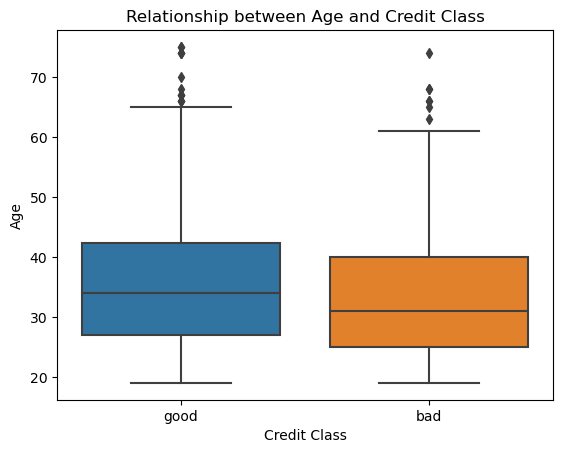

In [209]:
sns.boxplot(x='class', y='age', data=df)
plt.xlabel("Credit Class")
plt.ylabel("Age")
plt.title("Relationship between Age and Credit Class")
plt.show()

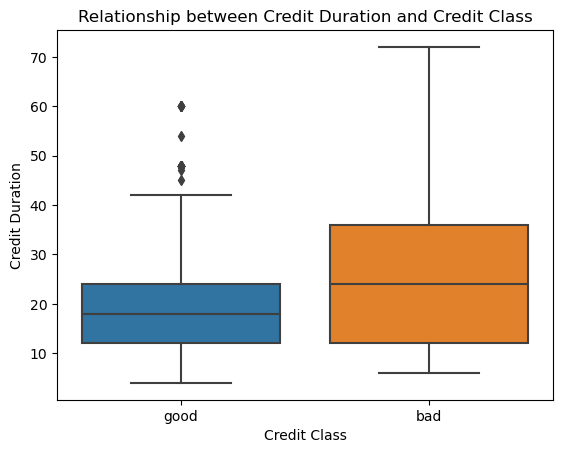

In [207]:
sns.boxplot(x='class', y='duration', data=df)
plt.xlabel("Credit Class")
plt.ylabel("Credit Duration")
plt.title("Relationship between Credit Duration and Credit Class")
plt.show()

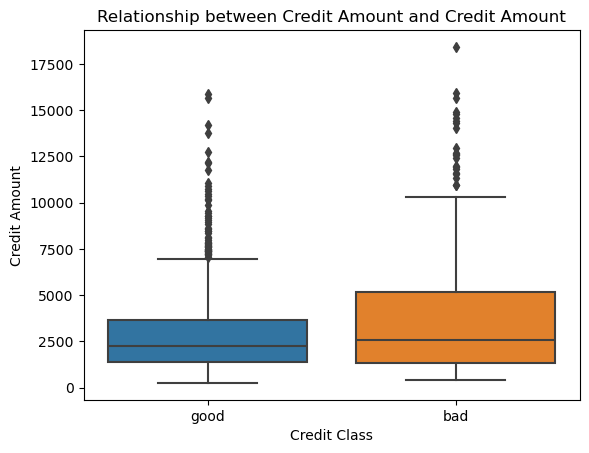

In [213]:
sns.boxplot(x='class', y='credit_amount', data=df)
plt.xlabel("Credit Class")
plt.ylabel("Credit Amount")
plt.title("Relationship between Credit Amount and Credit Amount")
plt.show()

**Evaluating the relationship between credit class and categorical variables**
*Purpose*
*Credit History*
*Employment History*
*Checking Account Status*
*Savings Account Status*
*Property Type Owned*
*Housing Ownership*
*Personal Status - Married, Divorced, Male/Female*
*Installment commitment*
*Telephone Ownership*
*Job Type - Skilled or unskilled*
*Residence Since - number of years in current residence*
*Num of Dependents*
*Other Payment Plans*
*Foreign worker or not*
*Other parties involved in credit*
*Payment Plan*

**Approach**
Step 1: Profiled the categorical variable - evaluated the distribution of different values using value counts
Step 2: If the distribution is too skewed, then ignore the variable
Step 3: Created a dataframe by grouping on "categorical variable" and computed the values of good and bad credit class for each value of the categorical variable using value_counts followed by unstack
Step 4: Added a column to the dataframe - that is the ratio of good credit classification to bad credit classification
Step 5: Added a column for the categorical variable - and assigned the index of the dataframe (which contains the different values of the categorical variable)
Step 6- Reset the index of the dataframe
Step 7 - Sorted the dataframe based on the values of the good to bad credit classification ratio
Step 8- Visualized the sorted dataframe using a seaborn barplot, with the x-axis the categorical variable y-axis the ratio of good to bad credit classification
Step 9 - Added a line to the bar plot that represented the benchmark value of good to bad credit classification ration (this is the ratio of the entire data set)
Step 10: Interpretation: 
    If the heights of the bars are **significantly different** then the categorical variable is a **strong predictor** of credit class. For categorical  variable values for which the bar height is above the benchmark line - then for that value there is a higher likelihood of good credit classification. On the flip side categorical  variable values for which the bar height is below the benchmark line there is a higher likelihood of bad credit classification.
    If the heights of the bars do not **vary significantly**, then the categorical variable is a weak predictor or is not correlated to credit classification.



**Insights:** 
**Strong predictors of credit classification**
*Purpose of the credit:* people requesting credit for retraining or used car or TV/ Furniture equipment have a much higher likelihood of having a good credit classification. While people requesting credit for education, new car, repairs etc. have a much a higher likelihood of having a bad credit classification.
*Credit History:* people having other credit with critical rating have a much higher likelihood of having a good credit classification. While people having no credits or all paid having a much higher likelihood of having bad credit classification.
*Employment History:* people having employment for more than 4 years have a much higher likelihood of having a good credit classification. While people who have less than 1 year of employment or are unemployed have a much higher likelihood of bad credit classification
*Checking Status* people having no checking account or having checking account with >200 have a higher likelihood of having a good credit classification. While people having checking account with <200 have a higher likelihood of bad credit classification.
*Savings Status* people having no savings account or having savings account with >5000 have a higher likelihood of having a good credit classification. While people having savings account with <500 have a higher likelihood of bad credit classification.
*Property owned* people owning real estate have a higher likelihood of having a good credit classification. While people not owning any property have a higher likelihood of bad credit classification.
*Home ownership* people owning their home have a higher likelihood of having a good credit classification. While people renting or living for free have higher likelihood of bad credit classification.


In [21]:
type_purpose=df['purpose'].value_counts()
type_purpose

purpose
radio/tv                280
'new car'               234
furniture/equipment     181
'used car'              103
business                 97
education                50
repairs                  22
'domestic appliance'     12
other                    12
retraining                9
Name: count, dtype: int64

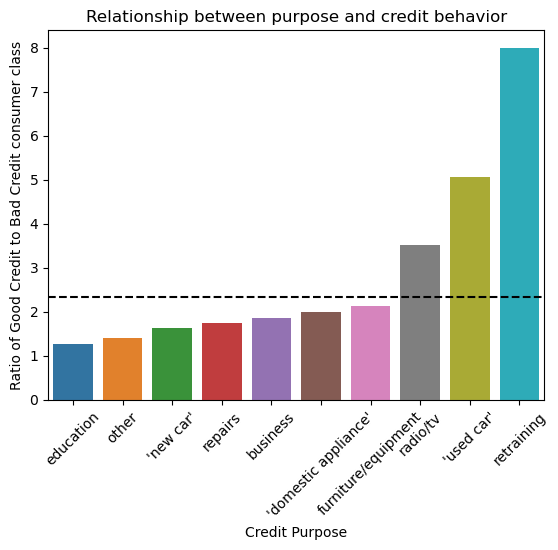

In [173]:
grouped_counts = df.groupby('purpose')['class'].value_counts().unstack(fill_value=0)
#grouped_counts.head()
# Calculate the ratio of 'good' to 'bad'
grouped_counts['good_to_bad_ratio'] = grouped_counts['good'] / grouped_counts['bad']
grouped_counts['purpose'] = grouped_counts.index
grouped_counts.reset_index(drop=True, inplace=True)
grouped_counts_sorted= grouped_counts.sort_values(by='good_to_bad_ratio')
my_plot1=sns.barplot(x='purpose', y='good_to_bad_ratio', data=grouped_counts_sorted)
my_plot1.set_xticklabels(my_plot1.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Credit Purpose")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between purpose and credit behavior")
plt.show()

Profiled the distribution of foreign workers to non-foreign workers using "value_counts" and it indicates that most workers are foreign, hence it
is not a useful variable to determine whether the credit class is good or bad.

In [79]:
type_credit_hist=df['credit_history'].value_counts()
type_credit_hist

credit_history
'existing paid'                     530
'critical/other existing credit'    293
'delayed previously'                 88
'all paid'                           49
'no credits/all paid'                40
Name: count, dtype: int64

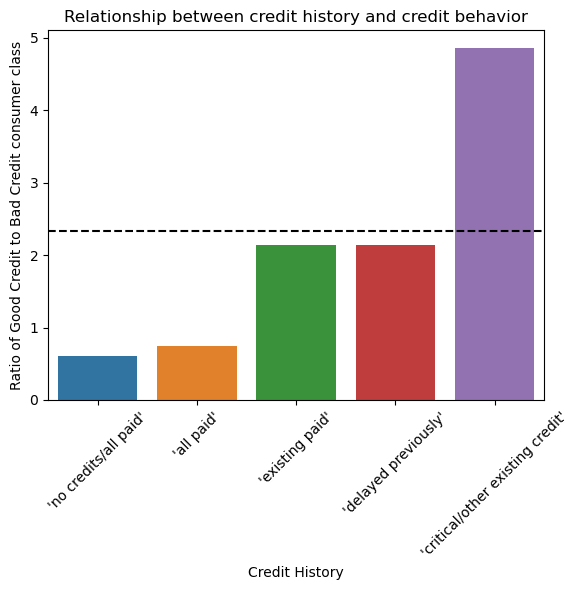

In [177]:
grouped_counts_credit = df.groupby('credit_history')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_credit['good_to_bad_ratio'] = grouped_counts_credit['good'] / grouped_counts_credit['bad']

grouped_counts_credit['credit_history'] = grouped_counts_credit.index
grouped_counts_credit.reset_index(drop=True, inplace=True)
grouped_credit_sorted= grouped_counts_credit.sort_values(by='good_to_bad_ratio')
my_plot3=sns.barplot(x='credit_history', y='good_to_bad_ratio', data=grouped_credit_sorted)
my_plot3.set_xticklabels(my_plot3.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Credit History")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between credit history and credit behavior")
plt.show()

In [93]:
type_employment=df['employment'].value_counts()
type_employment

employment
'1<=X<4'      339
'>=7'         253
'4<=X<7'      174
'<1'          172
unemployed     62
Name: count, dtype: int64

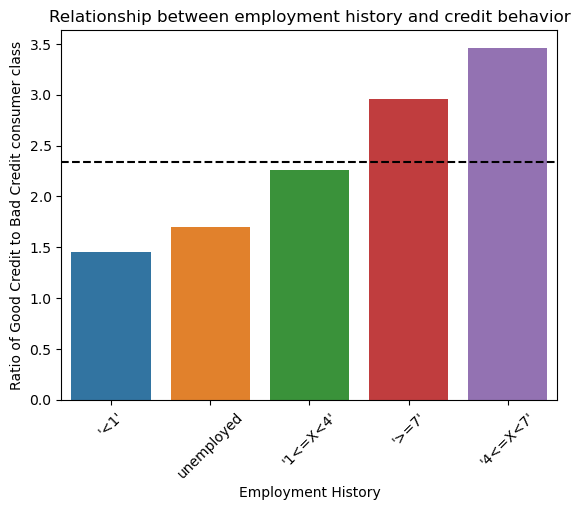

In [179]:
grouped_counts_empl = df.groupby('employment')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_empl['good_to_bad_ratio'] = grouped_counts_empl['good'] / grouped_counts_empl['bad']

grouped_counts_empl['employment'] = grouped_counts_empl.index
grouped_counts_empl.reset_index(drop=True, inplace=True)
grouped_counts_empl_sorted= grouped_counts_empl.sort_values(by='good_to_bad_ratio')
my_plot4=sns.barplot(x='employment', y='good_to_bad_ratio', data=grouped_counts_empl_sorted)
my_plot4.set_xticklabels(my_plot4.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Employment History")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between employment history and credit behavior")
plt.show()

In [101]:
type_checking=df['checking_status'].value_counts()
type_checking

checking_status
'no checking'    394
'<0'             274
'0<=X<200'       269
'>=200'           63
Name: count, dtype: int64

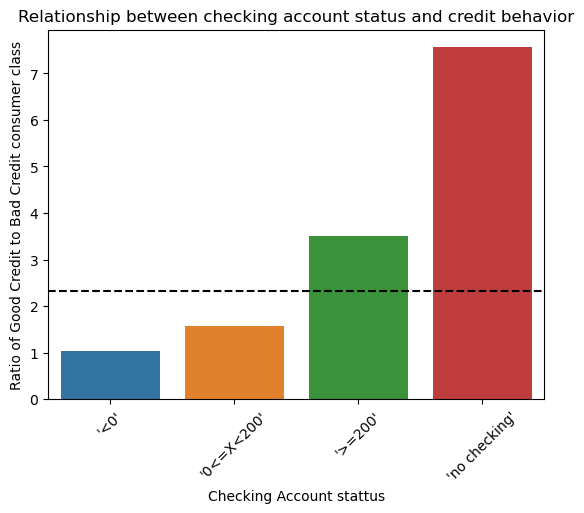

In [181]:
grouped_counts_check = df.groupby('checking_status')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_check['good_to_bad_ratio'] = grouped_counts_check['good'] / grouped_counts_check['bad']

grouped_counts_check['checking_status'] = grouped_counts_check.index
grouped_counts_check.reset_index(drop=True, inplace=True)
grouped_counts_check_sorted= grouped_counts_check.sort_values(by='good_to_bad_ratio')
my_plot5=sns.barplot(x='checking_status', y='good_to_bad_ratio', data=grouped_counts_check_sorted)
my_plot5.set_xticklabels(my_plot5.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Checking Account stattus")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between checking account status and credit behavior")
plt.show()

In [105]:
type_savings=df['savings_status'].value_counts()
type_savings

savings_status
'<100'                603
'no known savings'    183
'100<=X<500'          103
'500<=X<1000'          63
'>=1000'               48
Name: count, dtype: int64

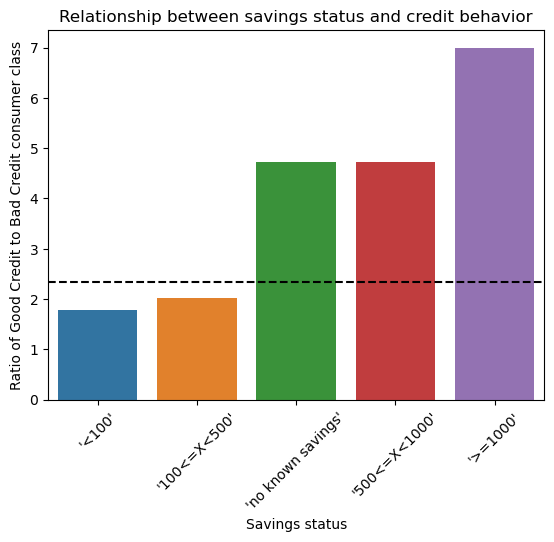

In [183]:
grouped_counts_savings = df.groupby('savings_status')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_savings['good_to_bad_ratio'] = grouped_counts_savings['good'] / grouped_counts_savings['bad']

grouped_counts_savings['savings_status'] = grouped_counts_savings.index
grouped_counts_savings.reset_index(drop=True, inplace=True)
grouped_counts_savings_sorted= grouped_counts_savings.sort_values(by='good_to_bad_ratio')
my_plot6=sns.barplot(x='savings_status', y='good_to_bad_ratio', data=grouped_counts_savings_sorted)
my_plot6.set_xticklabels(my_plot6.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Savings status")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between savings status and credit behavior")
plt.show()

In [129]:
#property_magnitude
type_property=df['property_magnitude'].value_counts()
type_property

property_magnitude
car                    332
'real estate'          282
'life insurance'       232
'no known property'    154
Name: count, dtype: int64

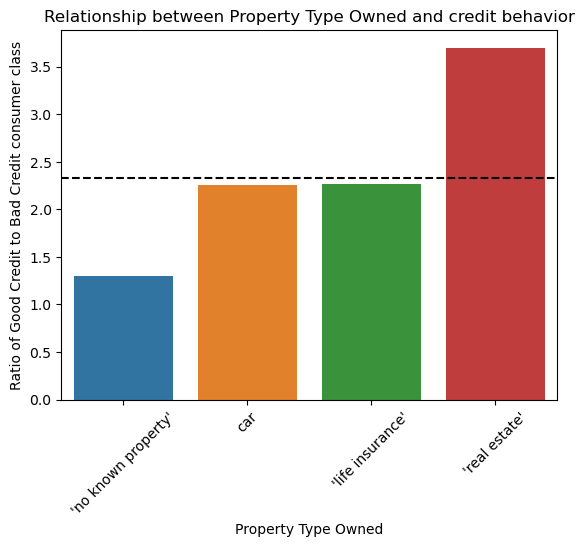

In [191]:
grouped_counts_property = df.groupby('property_magnitude')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_property['good_to_bad_ratio'] = grouped_counts_property['good'] / grouped_counts_property['bad']

grouped_counts_property['property_magnitude'] = grouped_counts_property.index
grouped_counts_property.reset_index(drop=True, inplace=True)
grouped_counts_property_sorted= grouped_counts_property.sort_values(by='good_to_bad_ratio')
my_plot10=sns.barplot(x='property_magnitude', y='good_to_bad_ratio', data=grouped_counts_property_sorted)
my_plot10.set_xticklabels(my_plot10.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Property Type Owned")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between Property Type Owned and credit behavior")
plt.show()

In [135]:
#housing
type_housing=df['housing'].value_counts()
type_housing

housing
own           713
rent          179
'for free'    108
Name: count, dtype: int64

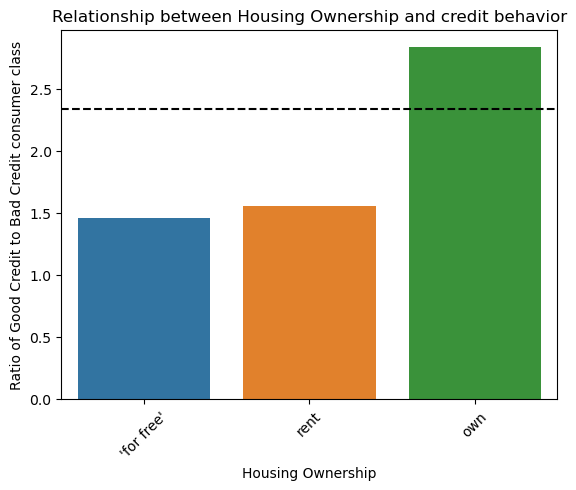

In [193]:
grouped_counts_housing = df.groupby('housing')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_housing['good_to_bad_ratio'] = grouped_counts_housing['good'] / grouped_counts_housing['bad']

grouped_counts_housing['housing'] = grouped_counts_housing.index
grouped_counts_housing.reset_index(drop=True, inplace=True)
grouped_counts_housing_sorted= grouped_counts_housing.sort_values(by='good_to_bad_ratio')
my_plot11=sns.barplot(x='housing', y='good_to_bad_ratio', data=grouped_counts_housing_sorted)
my_plot11.set_xticklabels(my_plot11.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Housing Ownership")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between Housing Ownership and credit behavior")
plt.show()

**Weak predictors of credit classification**
*Personal Status*
*Existing credit account*
*Number of installment commitments*
*Ownership of telephone*
*Job Type* - skilled or unskilled
*Number of years in residence*
*Number of dependents*

In [109]:
type_personal=df['personal_status'].value_counts()
type_personal

personal_status
'male single'           548
'female div/dep/mar'    310
'male mar/wid'           92
'male div/sep'           50
Name: count, dtype: int64

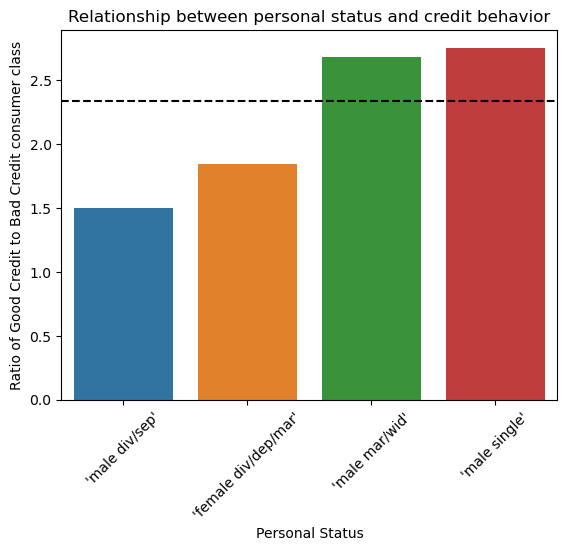

In [185]:
grouped_counts_personal = df.groupby('personal_status')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_personal['good_to_bad_ratio'] = grouped_counts_personal['good'] / grouped_counts_personal['bad']

grouped_counts_personal['personal_status'] = grouped_counts_personal.index
grouped_counts_personal.reset_index(drop=True, inplace=True)
grouped_counts_personal_sorted= grouped_counts_personal.sort_values(by='good_to_bad_ratio')
my_plot7=sns.barplot(x='personal_status', y='good_to_bad_ratio', data=grouped_counts_personal_sorted)
my_plot7.set_xticklabels(my_plot7.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Personal Status")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between personal status and credit behavior")
plt.show()

In [139]:
#existing_credits
type_existing_credits=df['existing_credits'].value_counts()
type_existing_credits

existing_credits
1    633
2    333
3     28
4      6
Name: count, dtype: int64

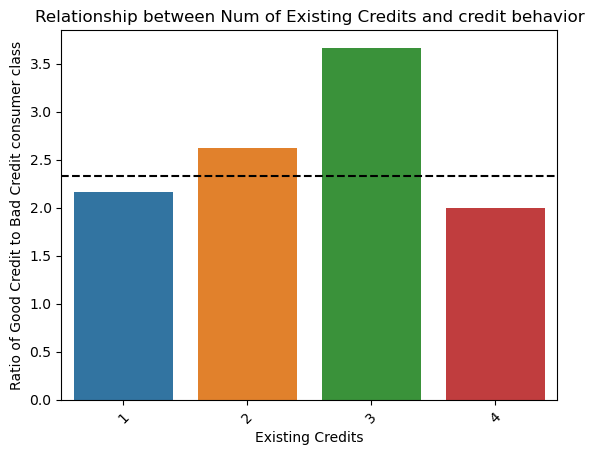

In [197]:
grouped_counts_existing_credits = df.groupby('existing_credits')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_existing_credits['good_to_bad_ratio'] = grouped_counts_existing_credits['good'] / grouped_counts_existing_credits['bad']

grouped_counts_existing_credits['existing_credits'] = grouped_counts_existing_credits.index
grouped_counts_existing_credits.reset_index(drop=True, inplace=True)
grouped_counts_existing_credits_sorted= grouped_counts_existing_credits.sort_values(by='good_to_bad_ratio')
my_plot12=sns.barplot(x='existing_credits', y='good_to_bad_ratio', data=grouped_counts_existing_credits_sorted)
my_plot12.set_xticklabels(my_plot12.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Existing Credits")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between Num of Existing Credits and credit behavior")
plt.show()

In [121]:
#installment_commitment
type_installment=df['installment_commitment'].value_counts()
type_installment

installment_commitment
4    476
2    231
3    157
1    136
Name: count, dtype: int64

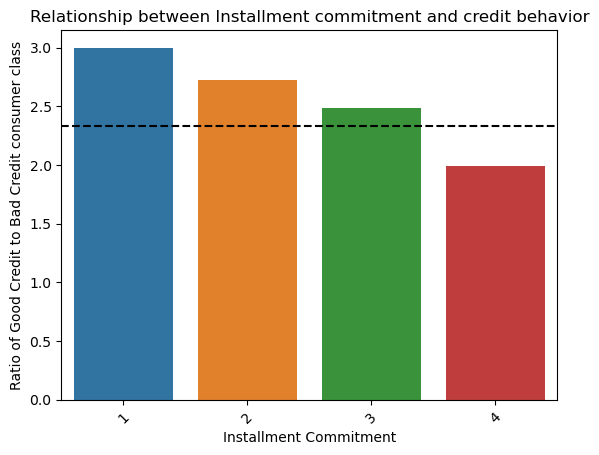

In [187]:
grouped_counts_installment = df.groupby('installment_commitment')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_installment['good_to_bad_ratio'] = grouped_counts_installment['good'] / grouped_counts_installment['bad']

grouped_counts_installment['installment_commitment'] = grouped_counts_installment.index
grouped_counts_installment.reset_index(drop=True, inplace=True)
grouped_counts_installment_sorted= grouped_counts_installment.sort_values(by='good_to_bad_ratio')
my_plot8=sns.barplot(x='installment_commitment', y='good_to_bad_ratio', data=grouped_counts_installment_sorted)
my_plot8.set_xticklabels(my_plot8.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Installment Commitment")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between Installment commitment and credit behavior")
plt.show()

In [73]:
type_telephone=df['own_telephone'].value_counts()
type_telephone

own_telephone
none    596
yes     404
Name: count, dtype: int64

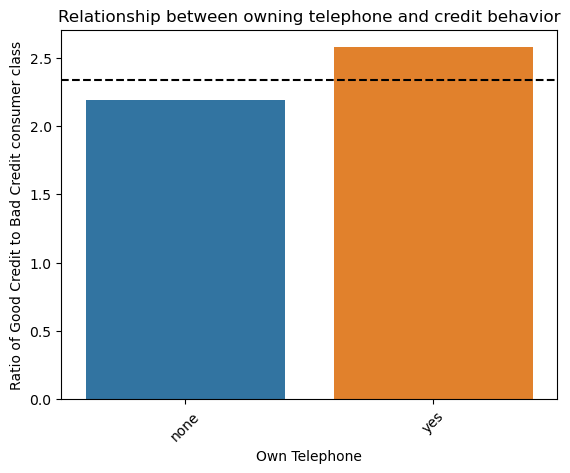

In [175]:
grouped_counts_tel = df.groupby('own_telephone')['class'].value_counts().unstack(fill_value=0)

# Calculate the ratio of 'good' to 'bad'
grouped_counts_tel['good_to_bad_ratio'] = grouped_counts_tel['good'] / grouped_counts_tel['bad']
grouped_counts_tel['own_telephone'] = grouped_counts_tel.index
grouped_counts_tel.reset_index(drop=True, inplace=True)
my_plot2=sns.barplot(x='own_telephone', y='good_to_bad_ratio', data=grouped_counts_tel)
my_plot2.set_xticklabels(my_plot2.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Own Telephone")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between owning telephone and credit behavior")
plt.show()

In [143]:
#job
type_job=df['job'].value_counts()
type_job

job
skilled                        630
'unskilled resident'           200
'high qualif/self emp/mgmt'    148
'unemp/unskilled non res'       22
Name: count, dtype: int64

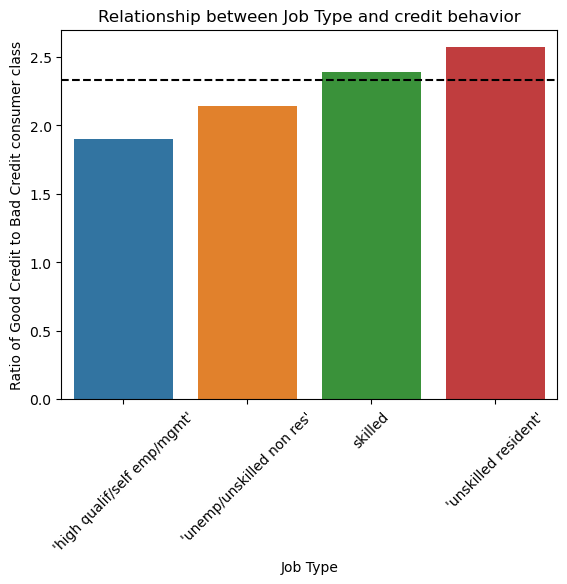

In [199]:
grouped_counts_job = df.groupby('job')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_job['good_to_bad_ratio'] = grouped_counts_job['good'] / grouped_counts_job['bad']

grouped_counts_job['job'] = grouped_counts_job.index
grouped_counts_job.reset_index(drop=True, inplace=True)
grouped_counts_job_sorted= grouped_counts_job.sort_values(by='good_to_bad_ratio')
my_plot13=sns.barplot(x='job', y='good_to_bad_ratio', data=grouped_counts_job_sorted)
my_plot13.set_xticklabels(my_plot13.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Job Type")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between Job Type and credit behavior")
plt.show()

In [125]:
#residence_since
type_residence=df['residence_since'].value_counts()
type_residence

residence_since
4    413
2    308
3    149
1    130
Name: count, dtype: int64

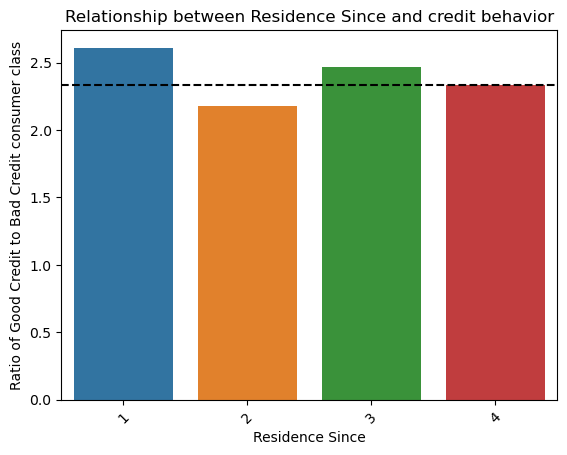

In [189]:
grouped_counts_residence = df.groupby('residence_since')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_residence['good_to_bad_ratio'] = grouped_counts_residence['good'] / grouped_counts_residence['bad']

grouped_counts_residence['residence_since'] = grouped_counts_residence.index
grouped_counts_residence.reset_index(drop=True, inplace=True)
grouped_counts_residence_sorted= grouped_counts_residence.sort_values(by='good_to_bad_ratio')
my_plot9=sns.barplot(x='residence_since', y='good_to_bad_ratio', data=grouped_counts_residence_sorted)
my_plot9.set_xticklabels(my_plot9.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Residence Since")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between Residence Since and credit behavior")
plt.show()

In [149]:
#num_dependents
type_dependents=df['num_dependents'].value_counts()
type_dependents

num_dependents
1    845
2    155
Name: count, dtype: int64

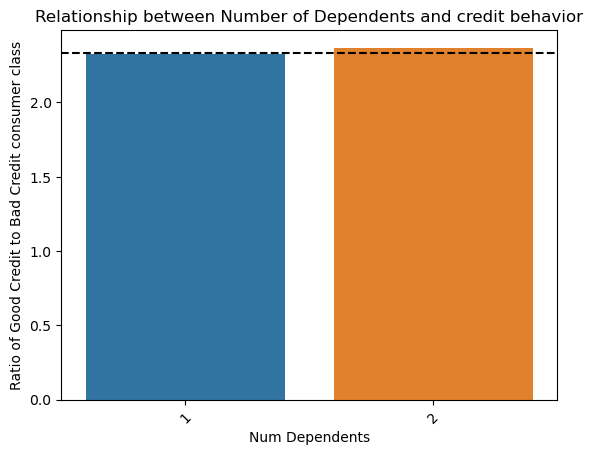

In [201]:
grouped_counts_dependents = df.groupby('num_dependents')['class'].value_counts().unstack(fill_value=0)
# Calculate the ratio of 'good' to 'bad'
grouped_counts_dependents['good_to_bad_ratio'] = grouped_counts_dependents['good'] / grouped_counts_dependents['bad']

grouped_counts_dependents['num_dependents'] = grouped_counts_dependents.index
grouped_counts_dependents.reset_index(drop=True, inplace=True)
grouped_counts_dependents_sorted= grouped_counts_dependents.sort_values(by='good_to_bad_ratio')
my_plot14=sns.barplot(x='num_dependents', y='good_to_bad_ratio', data=grouped_counts_dependents_sorted)
my_plot14.set_xticklabels(my_plot14.get_xticklabels(), rotation=45)
plt.axhline(y=good_to_bad_ratio_benchmark, color='black', linestyle='--', label='Benchmark ratio')
plt.xlabel("Num Dependents")
plt.ylabel("Ratio of Good Credit to Bad Credit consumer class")
plt.title("Relationship between Number of Dependents and credit behavior")
plt.show()

**Categorical variables ignored - based on the distribution in the data set**
*other parties* - other parties involved in the credit
*payment plan* - bank or stores or none
*worker type* - foreign or not

In [119]:
#other_parties
type_other=df['other_parties'].value_counts()
type_other

other_parties
none              907
guarantor          52
'co applicant'     41
Name: count, dtype: int64

In [133]:
#other_payment_plans
type_paymentplan=df['other_payment_plans'].value_counts()
type_paymentplan

other_payment_plans
none      814
bank      139
stores     47
Name: count, dtype: int64

In [70]:
type_worker=df['foreign_worker'].value_counts()
type_worker

foreign_worker
yes    963
no      37
Name: count, dtype: int64